In [291]:
library(ggplot2)
library(mgcv)

# C3M4 Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Observe the difference between GAMs and other regression models on simulated data.
2. Review how to plot and interpret the coefficient linearity for GAM models.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [292]:
# Load packages
library(ggplot2)
library(mgcv)

# Problem 1: GAMs with Simulated Data

In this example, we show how to check the validity of a generalized additive model (GAM) (using the `gam()` function) using simulated data. This allows us to try and understand the intricacies of `gam()` without having to worry about the context of the data. 

### 1. (a) Simulate the Data

Let $n = 200$. First, construct three predictor variables. The goal here is to construct a GAM with different types of predictor terms (e.g., factors, continuous variables, some that will enter linearly/parametrically, some that enter transformed).

1. x1: A continuous predictor that, we will suppose has a nonlinear relationship with the response.
2. x2: A categorical variable with three levels: `s`, `m`, and `t`.
3. x3: A categorical variable with two levels: `TRUE` and `FALSE`.

Then, make the response some nonlinear/nonparametric function of $\mathbf{x}$. For our case, use: $$\log(\mu_i) = \beta_1 + \sin(0.5x_{i,1}^2) - x_{i,2} + x_{i,3}$$ This model is a Poisson GAM. In a realworld situation, we wouldn't know this functional relationship and would estimate it. Other terms are modeled parametrically. The response has normal noise.

Note that:

1. The construction of $\boldsymbol\mu = (\mu_1,...,\mu_n)^T$ has the linear predictor exponentiated, because of the nature of the link function. 
2. We use $\boldsymbol\mu$ to construct $\mathbf{y}  = (y_1,...,y_n)^T $. The assumption for Poisson regression is that the random variable $Y_i$ that generates $y_i$ is Poisson with mean $\mu_i$. 
3. `as.integer(as.factor(VARIABLE))` converts the labels of VARIABLE to 1, 2, 3,.. so that we can construct the relationship for these factors.

Plot the relationship of $\mathbf{y}$ to each of the predictors. **Then, split the data into a training (`train_sim`) and test (`test_sim`) set**.

`geom_smooth()` using method = 'loess'

`geom_smooth()` using method = 'loess'



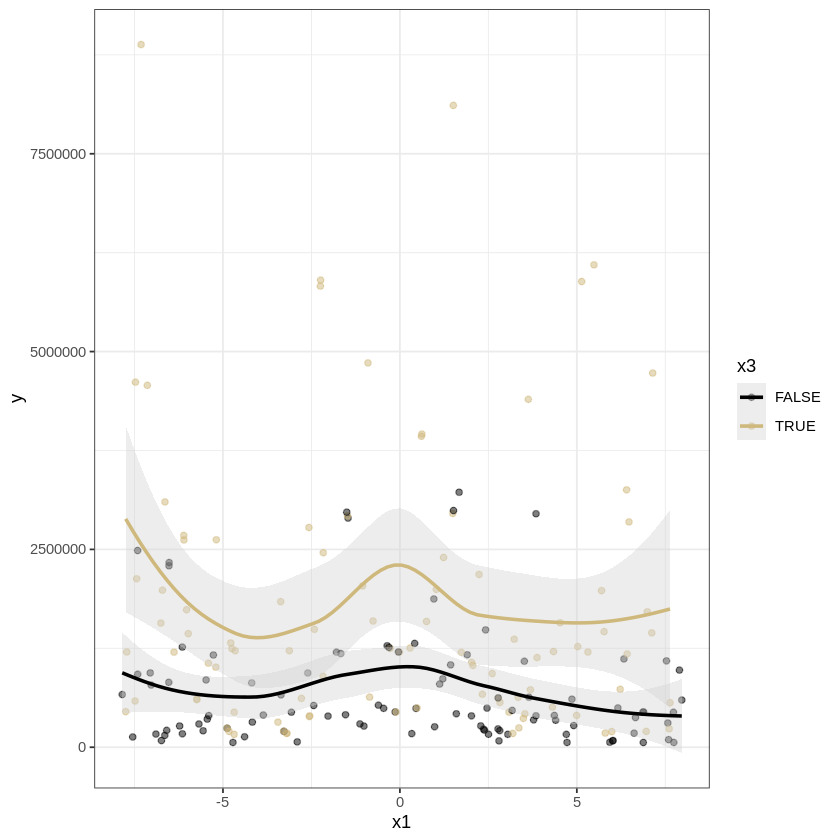

[1] 150   4

[1] 50  4

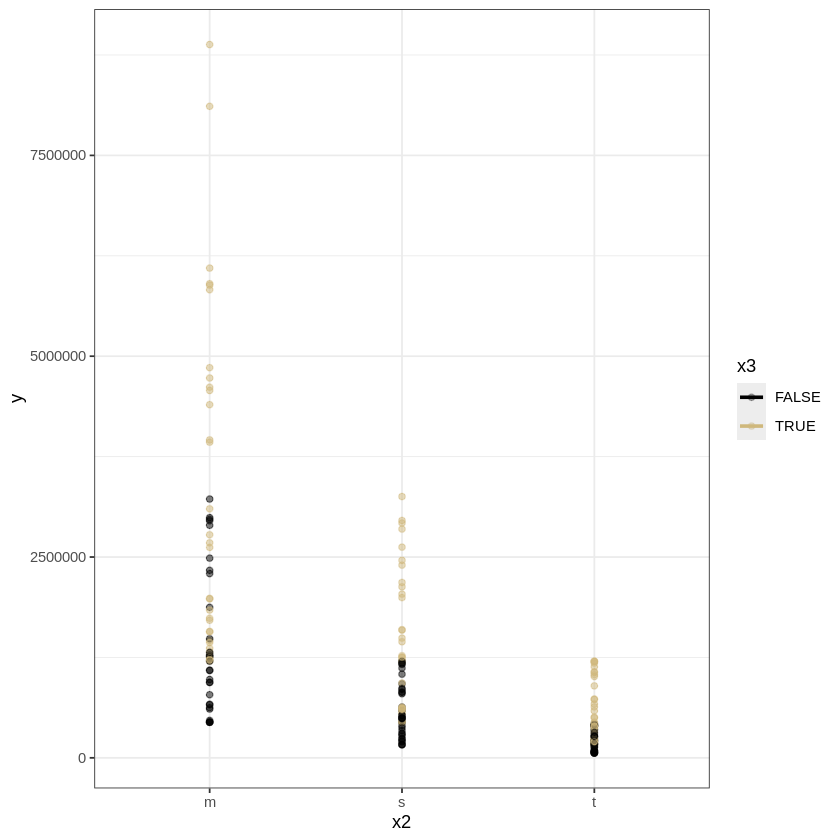

In [293]:
set.seed(0112358)
# n = number of data points
n = 200
beta1 = 14

df = data.frame(
    x1 = runif(n,-8,8),
    x2 = as.factor(sample(c('s', 'm', 't'), size=n, replace=TRUE)),
    x3 = as.factor(sample(c(TRUE, FALSE), size=n, replace=TRUE))
)
mu = with(df, exp(beta1 + sin(0.5*x1^2) - as.integer(x2) + as.integer(x3)) )
df$y = rnorm(n, mu, 0.1);


ggplot(df, aes(x1,y, col = x3)) +
geom_point(alpha = 0.5) +
geom_smooth(formula = y ~ x, fill = "lightgrey") +
scale_color_manual(values=c('black','#CFB87C', 'darkgrey')) +
theme_bw()

ggplot(df, aes(x2,y, col = x3)) +
geom_point(alpha = 0.5) +
geom_smooth(formula = y ~ x, fill = "lightgrey") +
scale_color_manual(values=c('black','#CFB87C', 'darkgrey')) +
theme_bw()


sz <- floor(0.75 * nrow(df))
index <- sample(seq_len(nrow(df)), size = sz)

train_sim <- df[index, ]
test_sim <- df[-index, ]
dim(train_sim)
dim(test_sim)

### 1. (b) Other Regression Models

Before jumping straight into GAMs, let's test if other regression models work. What about a regular linear regression model with ordinary least squares, and a generalized linear model for Poisson regression?

First fit a linear regression model to your `train_sim` data. We know that all of the predictors were used to make the response, but are they all significant in the linear regression model? Explain why this may be.

Then fit a Generalize Linear Model (GLM) to the `train_sim` data. Plot three diagnostic plots for your GLM:

1. Residual vs. log(Fitted Values)
2. QQPlot of the Residuals
3. Actual Values vs. Fitted Values

Using these plots, determine whether this model is a good fit for the data. Make sure to explain your conclusions and reasoning.


Call:
lm(formula = y ~ ., data = train_sim)

Residuals:
     Min       1Q   Median       3Q      Max 
-1741838  -661503   -43496   406887  5927683 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1938456     185856  10.430  < 2e-16 ***
x1              2192      18689   0.117    0.907    
x2s         -1408868     231404  -6.088 9.72e-09 ***
x2t         -2068616     213165  -9.704  < 2e-16 ***
x3TRUE       1029760     178048   5.784 4.33e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1087000 on 145 degrees of freedom
Multiple R-squared:  0.4813,	Adjusted R-squared:  0.467 
F-statistic: 33.63 on 4 and 145 DF,  p-value: < 2.2e-16



Call:
glm(formula = y ~ ., family = "poisson", data = train_sim)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1386.0   -532.6   -129.5    351.5   2439.5  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept)  1.414e+01  1.542e-04 91717.15   <2e-16 ***
x1           2.718e-04  1.498e-05    18.15   <2e-16 ***
x2s         -8.472e-01  1.815e-04 -4667.97   <2e-16 ***
x2t         -1.837e+00  2.283e-04 -8045.33   <2e-16 ***
x3TRUE       9.109e-01  1.652e-04  5514.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 196867604  on 149  degrees of freedom
Residual deviance:  66920170  on 145  degrees of freedom
AIC: Inf

Number of Fisher Scoring iterations: 5


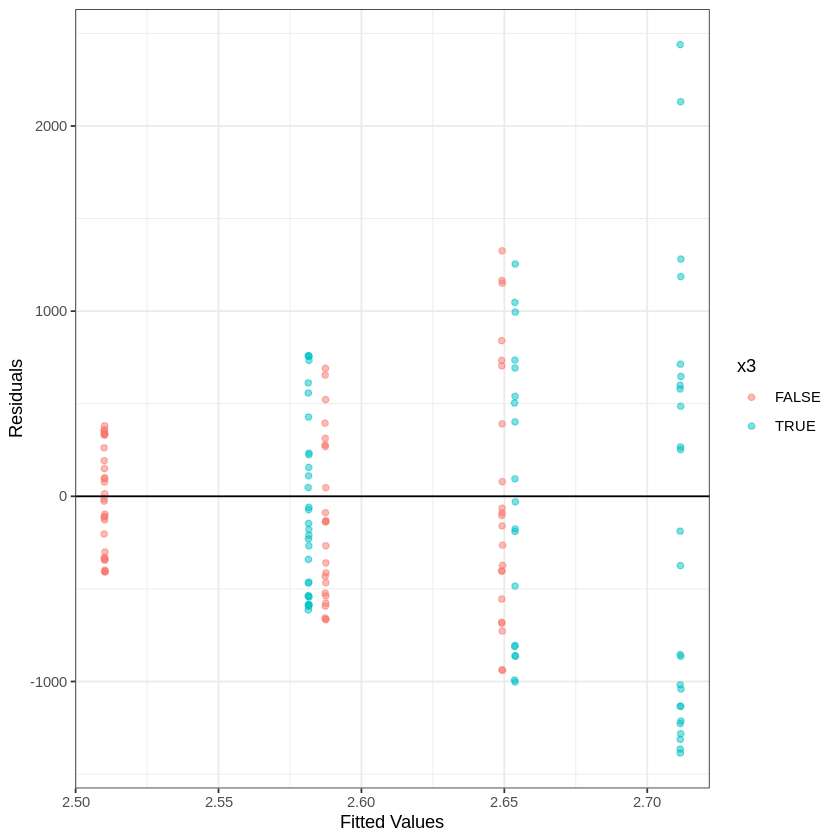

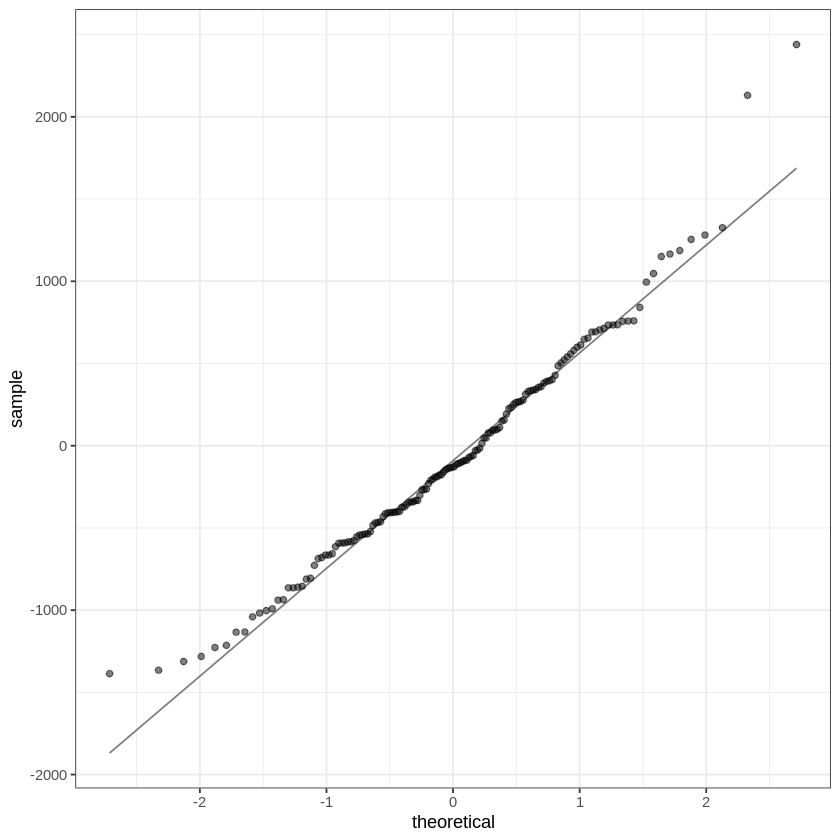

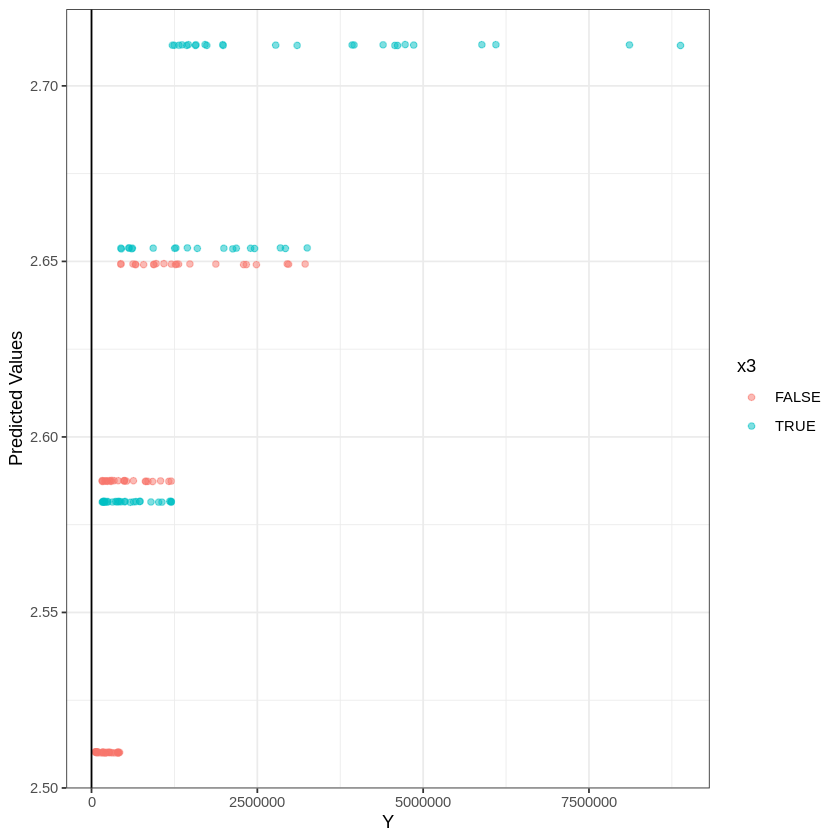

In [294]:
options(warn=-1)
# Fit a LM model to the data
lmod = lm(y ~ ., train_sim)
summary(lmod)


# Fit a GLM model to the data
glmod = glm(y ~ ., train_sim, family="poisson")
summary(glmod)


# Create the three specified plots
#residual plot
glmodres = residuals(glmod)
glmodp = predict(glmod,train_sim)
d_glmod = data.frame(glmodp, glmodres, x3 = train_sim$x3)

ggplot(d_glmod,aes(log(glmodp), glmodres, col = x3)) +
geom_point(alpha = 0.5) +
geom_hline(yintercept = 0) +
xlab("Fitted Values") +
ylab("Residuals") +
theme_bw()

## qqplot
ggplot(d_glmod,aes(sample = glmodres)) +
stat_qq( alpha = 0.5) + stat_qq_line( alpha = 0.5) +
theme_bw()


#fitted vs actual
ggplot(train_sim,aes(y, log(predict(glmod,train_sim)), col = x3)) +
geom_point(alpha = 0.5) +
geom_abline(slope=1) +
theme_bw() +
xlab("Y") +
ylab("Predicted Values")



<span style="color:orange">
 
The linear model is definitely not a good fit for the data by looking at the summary. The adjusted-$R^2$ is nearer to zero than it is to a reasonable explained deviance that we can have confidence in. Additionally, the non-linear predictor is not significant in the model, because as we designed the data, that predictor does not abide by the assumptions for a linear model.

</span>

<span style="color:orange">
    The poisson GLM is a much better fit for the data because it accounts for the nonlinear predictors. The Q-Q plot and the residuals plot show that the model is a good fit. I am inconclusive on the predicted values plot. Overall, the summary suggests that all of the preictors are not significant to the model.
</span>

### 1. (c) Looking for those GAMs

Now, it's time to see how a generalized additive model (GAM) performs! Fit a GAM to the data. Construct the same three plots for your GAM model. Do these plots look better than those of the GLM?


Family: quasipoisson 
Link function: log 

Formula:
y ~ s(x1) + x2 + x3

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.0798     0.1001 140.676  < 2e-16 ***
x2s          -0.8586     0.1180  -7.276 2.31e-11 ***
x2t          -1.7492     0.1484 -11.789  < 2e-16 ***
x3TRUE        0.9058     0.1066   8.495 2.73e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
        edf Ref.df     F p-value   
s(x1) 7.102  8.141 3.295 0.00155 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.618   Deviance explained = 72.5%
GCV = 4.2092e+05  Scale est. = 4.0596e+05  n = 150

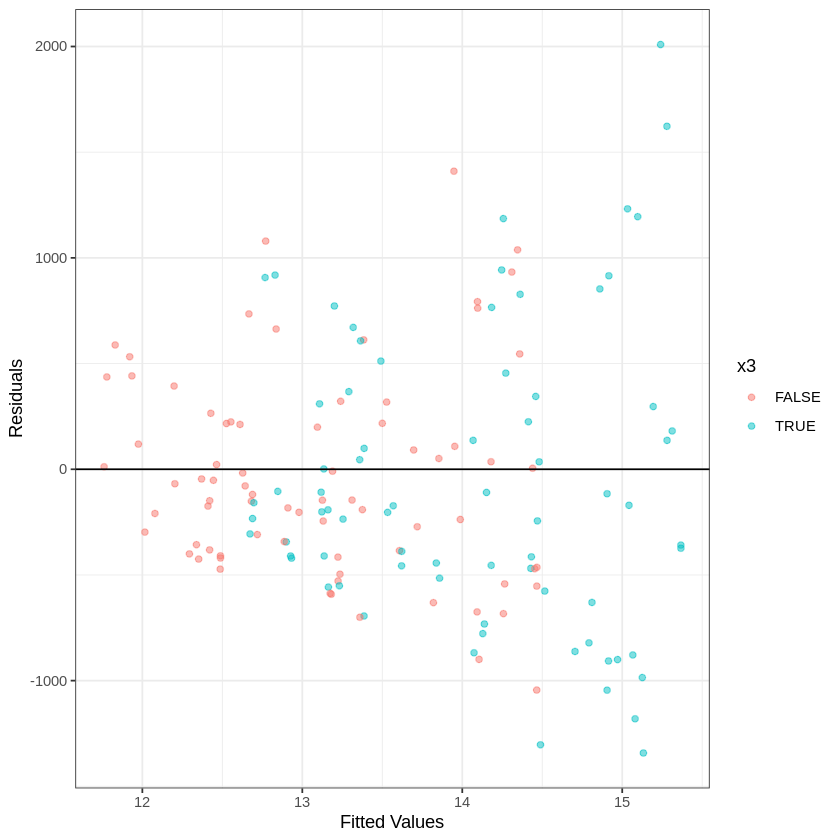

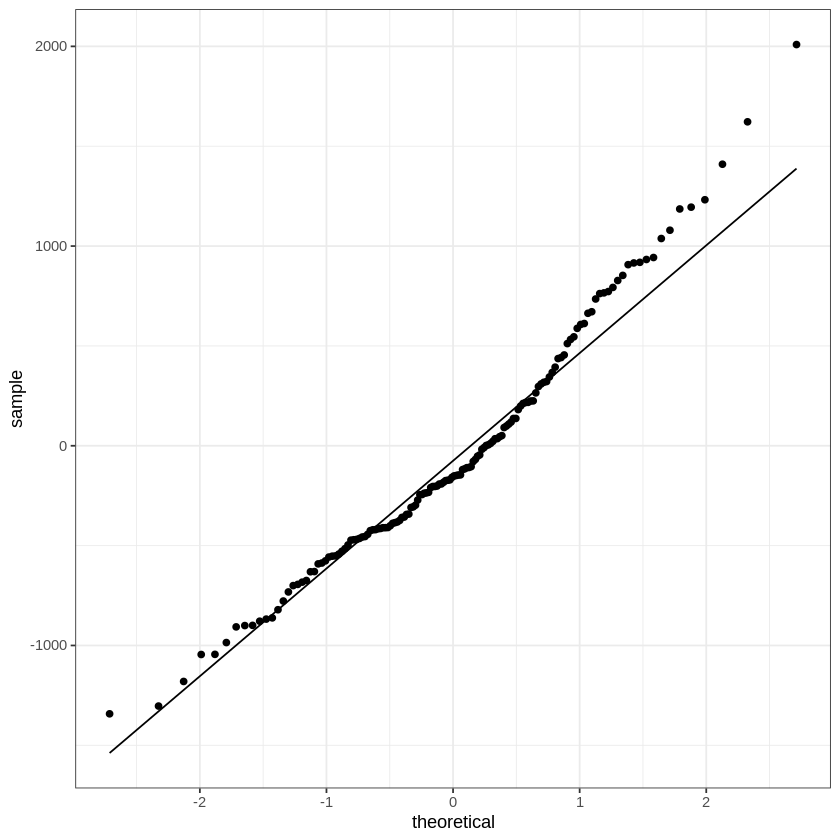

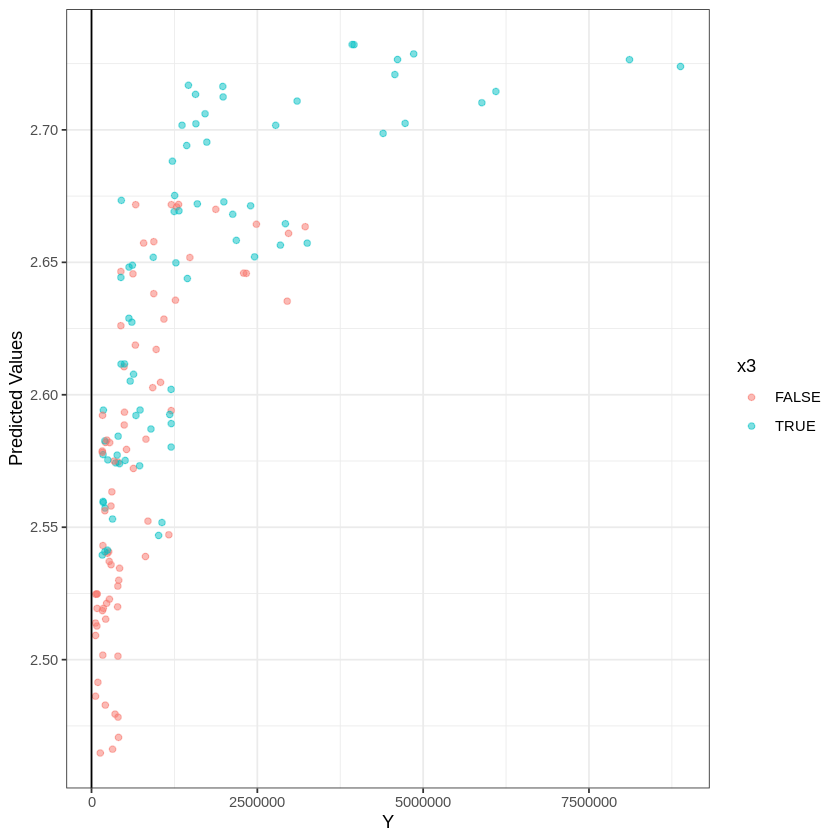

In [295]:
# Fit a GAM model to the data
gammod = gam(y ~ s(x1) + x2 + x3, data=train_sim, family = quasipoisson)
summary(gammod)

# Construct the three specified plots
#residual vs fitted 
gammodres = residuals(gammod)
gammodp = predict.gam(gammod)
d_gammod = data.frame(log(gammodp), gammodres, x3 = train_sim$x3)
ggplot(d_gammod,aes(gammodp, gammodres, col = x3)) +
geom_point(alpha = 0.5) +
geom_hline(yintercept = 0) +
xlab("Fitted Values") +
ylab("Residuals") +
theme_bw()


## qqplot
ggplot(d_gammod,aes(sample = gammodres)) +
stat_qq() + stat_qq_line() +
theme_bw()

#fitted vs actual
ggplot(train_sim,aes(y,log(predict.gam(gammod,train_sim)), col = x3)) +
geom_point(alpha = 0.5) +
geom_abline(slope=1) +
theme_bw() +
xlab("Y") +
ylab("Predicted Values")


<span style="color:orange">
    The quasi-poisson GAM plots look more like what we would expect. The datapoints are more normally scattered than before. The Q-Q plot has a looser fit at the tails, but it is not too far off to choose the GLM over the GAM. At this point, I do not think the more adequate model is obvious. 
</span>

### 1. (d) Interpreting GAMs

We made a GAM model! However GAMs are harder to interpret than regular linear regression models. How do we determine if a GAM model was necesary? Or, in other words, how do we determine if our predictors have a linear relationship with the response?

Use the `plot.gam()` function in the mgcv library to plot the relationship between `y` and `x1`. Recall that $x_1$ entered our model as $\sin(0.5x_{i,1}^2)$, and we plotted that relationship in **1.(a)**. Does your plot confirm this relationship?

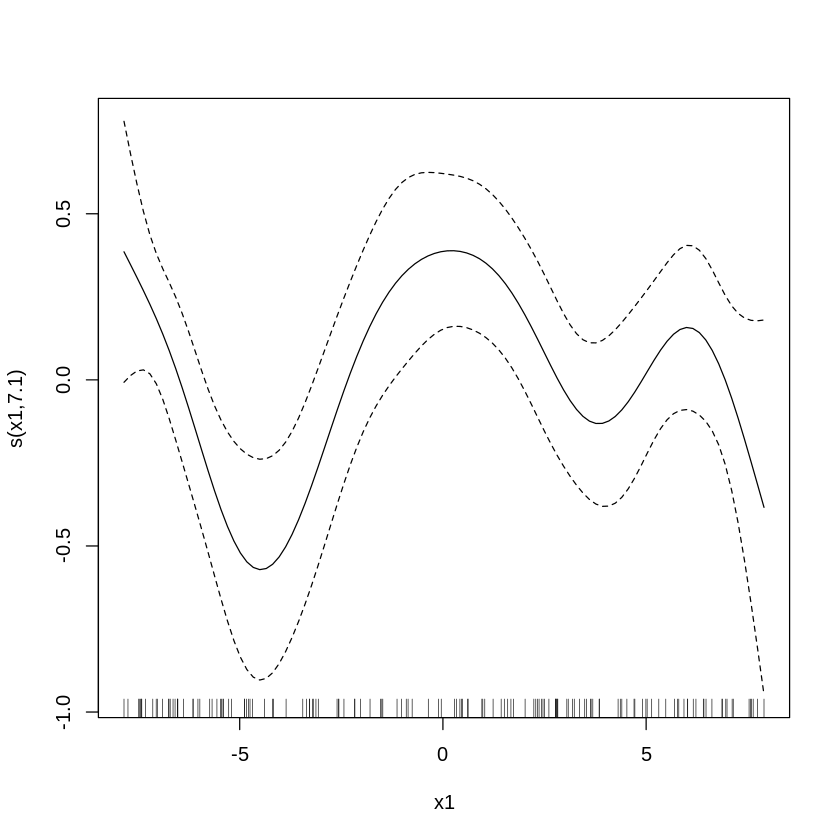

In [296]:
plot.gam(gammod)

<span style="color:orange">
    We can look at the previous plot and infer that a nonlinear and nonparametric fit is necessary or justified because the confidence bands from the GAM fit closely to the predictor, and it is visually evident that a linear function could not fit between the confidence bands. Additionally, the EDF for the smoothed predictor is high, which is suggestive that it is necessary to have it modeled nonlinearly. As we can see from the previous plot, the x1 perdictor needs to enter the model nonlinearly whereas the rest were okay being linear.
</span>

### 1.(e) Model comparison

Compute the mean squared prediction error (MSPE) for each of the three models above (regression model, GLM, and GAM). State which model performs based according to this metric.

Remember, the MSPE is given by 

\begin{align*}
MSPE = \frac{1}{k}\sum^k_{i=1}\left(y^\star_i - \widehat{y}^\star_i \right)^2 
\end{align*}

where $y^\star_i$ are the observed response values in the test set and $\widehat{y}^\star_i$ are the predicted values for the test set (using the model fit on the training set).

In [297]:
#mspe for lm
MSPElmod = mean((test_sim$y - predict(lmod,test_sim))^2)
cat(" The MSPE for the standard linear model is ", MSPElmod, ".")

#mspe for glm
MSPEglmod = mean((test_sim$y - predict(glmod,test_sim))^2)
cat(" The MSPE for the generalized linear model is ", MSPEglmod, ".")


# mspe for gam
MSPEgammod = mean((test_sim$y - predict.gam(gammod,test_sim))^2)
cat(" The MSPE for the generalized additive model is ", MSPEgammod, ".")


 The MSPE for the standard linear model is  9.42792e+11 . The MSPE for the generalized linear model is  3.024099e+12 . The MSPE for the generalized additive model is  3.024099e+12 .

<span style="color:orange">
    According to the MSPE, the GLM and the GAM performed the same. If we call back to the original plots in 1a, this can be explained by the observation that the data showed a clear nonlinear relationship, but the confidence bands would allow for a linear model. In both the GLM and GAM model summary, all of the predictors were considered significant. Both models show sufficient fit. This result seems strange to me.

# Problem 2 Additive models with the advertising data

The following dataset containts measurements related to the impact of three advertising medias on sales of a product, $P$. The variables are:

- `youtube`: the advertising budget allocated to YouTube. Measured in thousands of dollars;

- `facebook`: the advertising budget allocated to Facebook. Measured in thousands of dollars; and 

- `newspaper`: the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

- `sales`: the value in the $i^{th}$ row of the sales column is a measurement of the sales (in thousands of units) for product $P$ for company $i$.

The advertising data treat "a company selling product $P$" as the statistical unit, and "all companies selling product $P$" as the population. We assume that the $n = 200$ companies in the dataset were chosen at random from the population (a strong assumption!).

First, we load the data, plot it, and split it into a training set (`train_marketing`) and a test set (`test_marketing`).

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


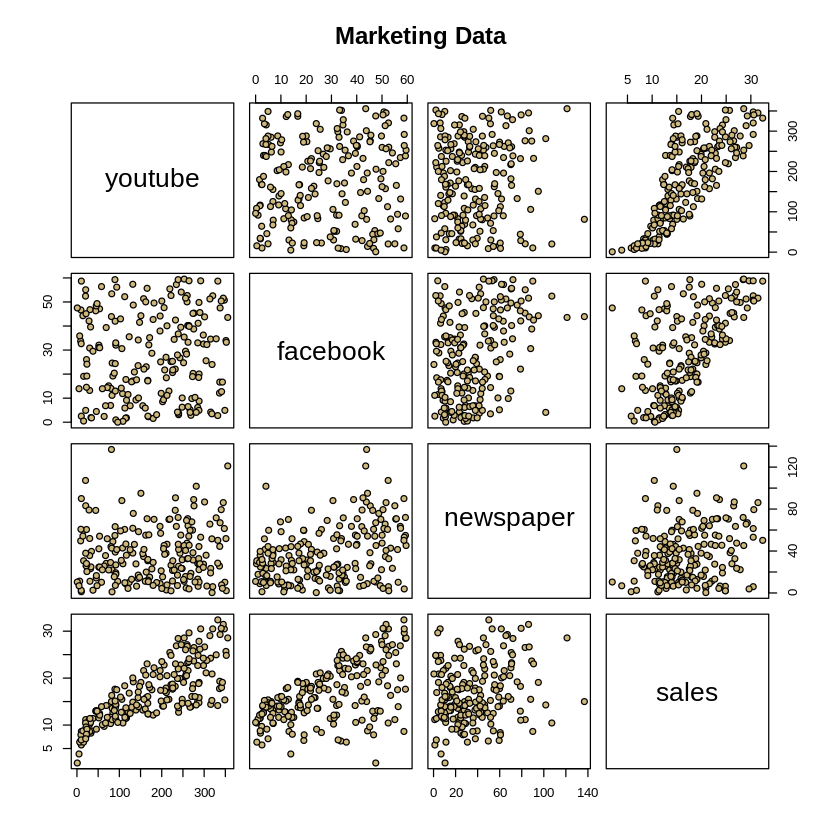

In [298]:
# Load in the data
marketing = read.csv("marketing.txt", sep = "")
head(marketing)
pairs(marketing, main = "Marketing Data", pch = 21, 
      bg = c("#CFB87C"))

In [299]:
set.seed(177) #set the random number generator seed.
n = floor(0.8 * nrow(marketing)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(marketing)), size = n) #randomly sample indicies to be included in the training set

train_marketing = marketing[index, ] #set the training set to be the randomly sampled rows of the dataframe
test_marketing = marketing[-index, ] #set the testing set to be the remaining rows
dim(test_marketing) #check the dimensions
dim(train_marketing) #check the dimensions

[1] 40  4

[1] 160   4

**2.(a) Let's try a GAM on the marketing data!**

Note that the relationship between `sales` and `youtube` is nonlinear. This was a problem for us back in the first course in this specialization, when we modeled the data as if it were linear. In the last module, we focused on modeling the relationship between `sales` and `youtube`, omitting the other variables. Now it's time to include the additional predictors.

Using the `train_marketing` fit an additive model to the data and store it in `gam_marketing`. Produce the relevant added variable plots using `plot(gam_marketing)`. Comment on the fit of the model.


Family: gaussian 
Link function: identity 

Formula:
sales ~ s(youtube) + s(facebook) + s(newspaper)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.5743     0.1321   125.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df       F p-value    
s(youtube)   6.037  7.127 201.356  <2e-16 ***
s(facebook)  1.000  1.000 481.319  <2e-16 ***
s(newspaper) 1.000  1.000   0.593   0.442    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.929   Deviance explained = 93.3%
GCV = 2.9572  Scale est. = 2.7902    n = 160

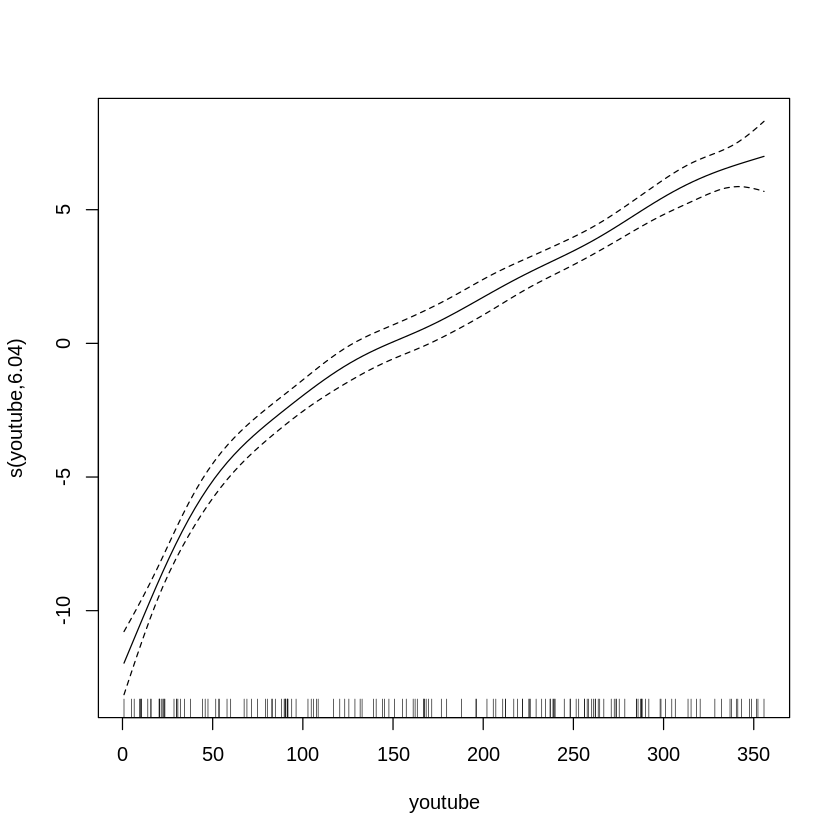

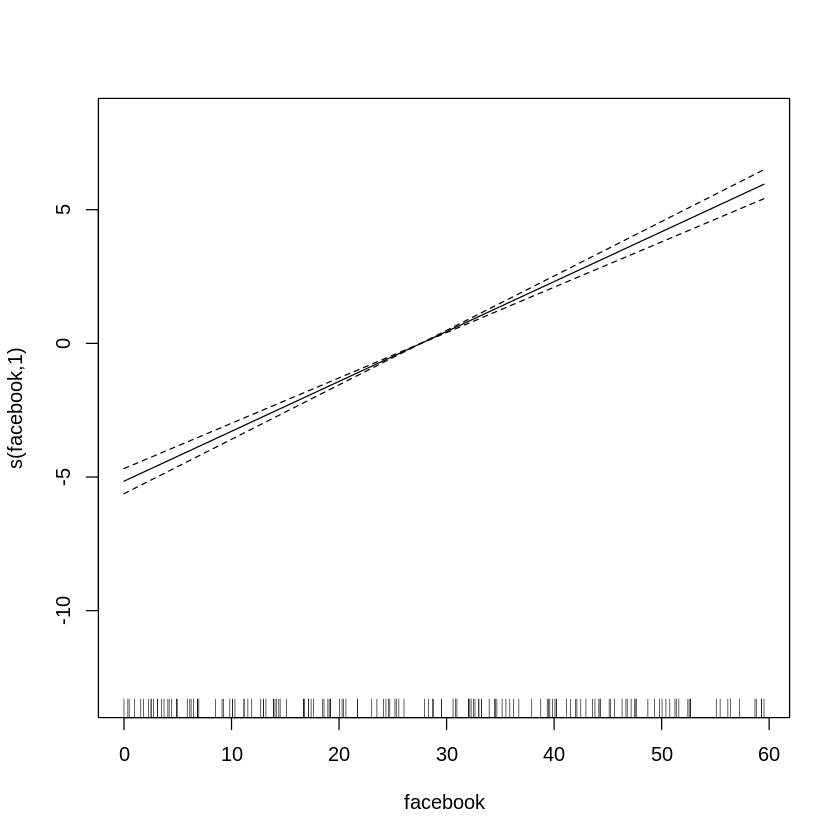

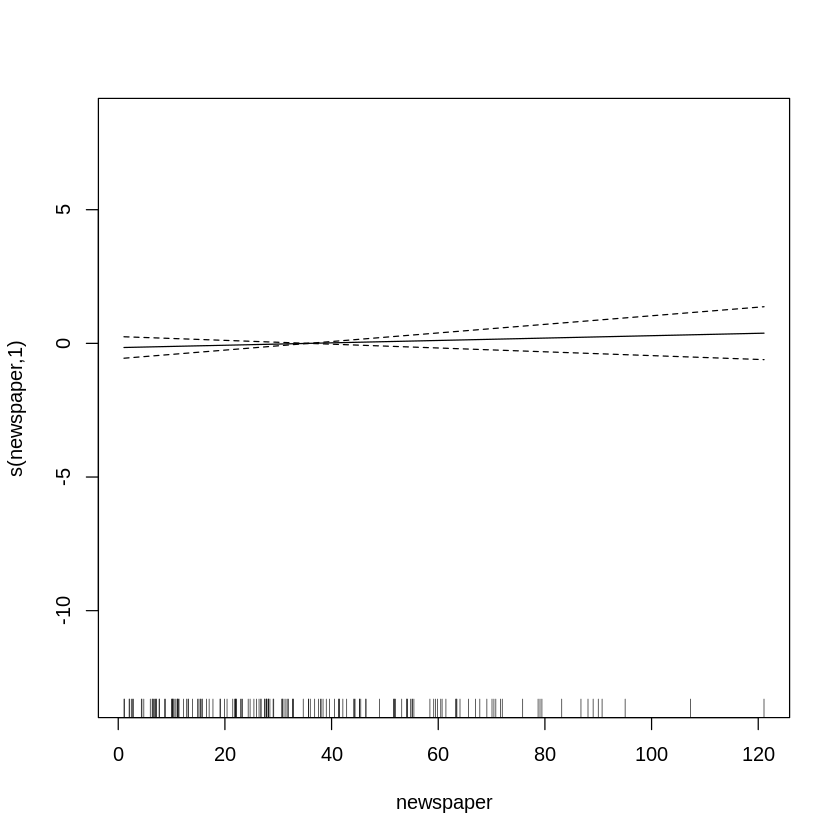

In [300]:
gam_marketing = gam(sales ~ s(youtube) + s(facebook) + s(newspaper), data=train_marketing, family = gaussian)
summary(gam_marketing)
plot.gam(gam_marketing)

<span style="color:orange"> 
    The model fits well. 93% of the deviance is explained by the model, which is very high. It is important to note that the EDF for the predictors facebook and newspaper are much lower than that of youtube, which makes sense because as we know and as we can tell from the plots, newspaper and facebook are linear variables while youtube is known to be nonlinear. Additionally, newspaper is not significant, unlike facebook and youtube.

**2.(b) Semiparametric modeling of the marketing data**

Refit the additive model based on your results from 2.(a). That is, if any predictors above should enter linearly, refit the model to reflect that. If any predictors are statistically insignificant, remove them from the model. Store your final model in `semiparametric_marketing`.


Family: gaussian 
Link function: identity 

Formula:
sales ~ s(youtube) + facebook + newspaper

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.264013   0.279555  40.293   <2e-16 ***
facebook     0.186582   0.008530  21.874   <2e-16 ***
newspaper    0.004403   0.005811   0.758     0.45    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
           edf Ref.df     F p-value    
s(youtube) 5.9  7.047 202.1  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.929   Deviance explained = 93.2%
GCV = 2.9718  Scale est. = 2.8065    n = 160

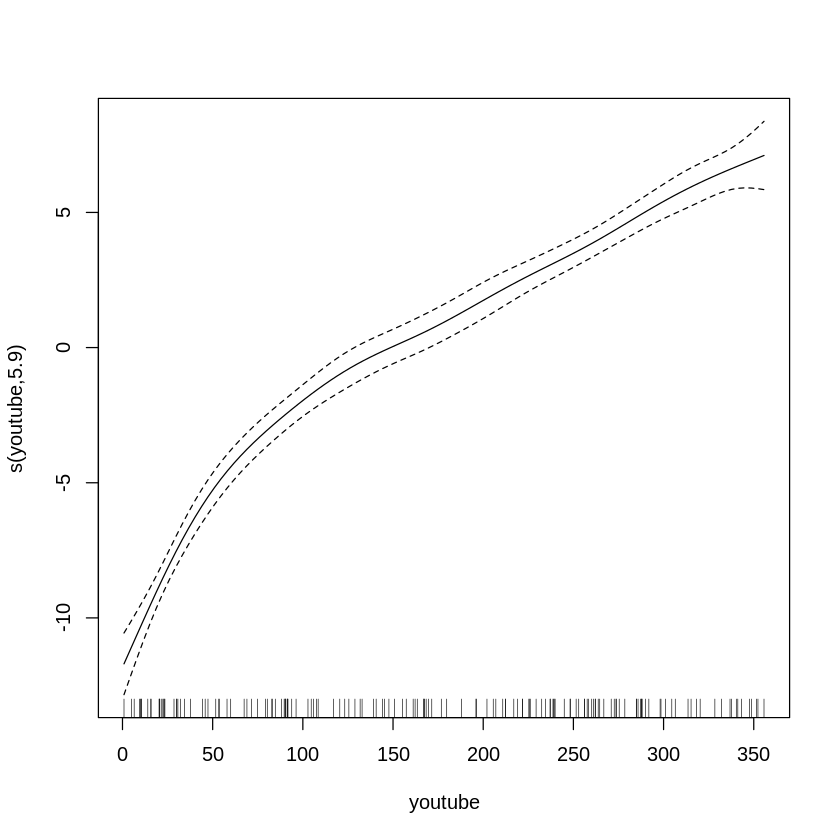

In [301]:
gam_marketing = gam(sales ~ s(youtube) + facebook + newspaper, data=train_marketing, family = gaussian)
summary(gam_marketing)
plot.gam(gam_marketing)

<span style="color:orange"> 
    Again, the model fits well. 93% of the deviance is explained by the model, which is still very high. Because the EDF for the predictors facebook and newspaper are much lower than that of youtube, they were entered linearly in this iteration of the model. Additionally, newspaper is still not significant, so it will be removed in the next iteration of the model below.


Family: gaussian 
Link function: identity 

Formula:
sales ~ s(youtube) + facebook

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.352099   0.253895   44.71   <2e-16 ***
facebook     0.189085   0.007848   24.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df     F p-value    
s(youtube) 5.979  7.127 200.9  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.929   Deviance explained = 93.2%
GCV = 2.9438  Scale est. = 2.797     n = 160

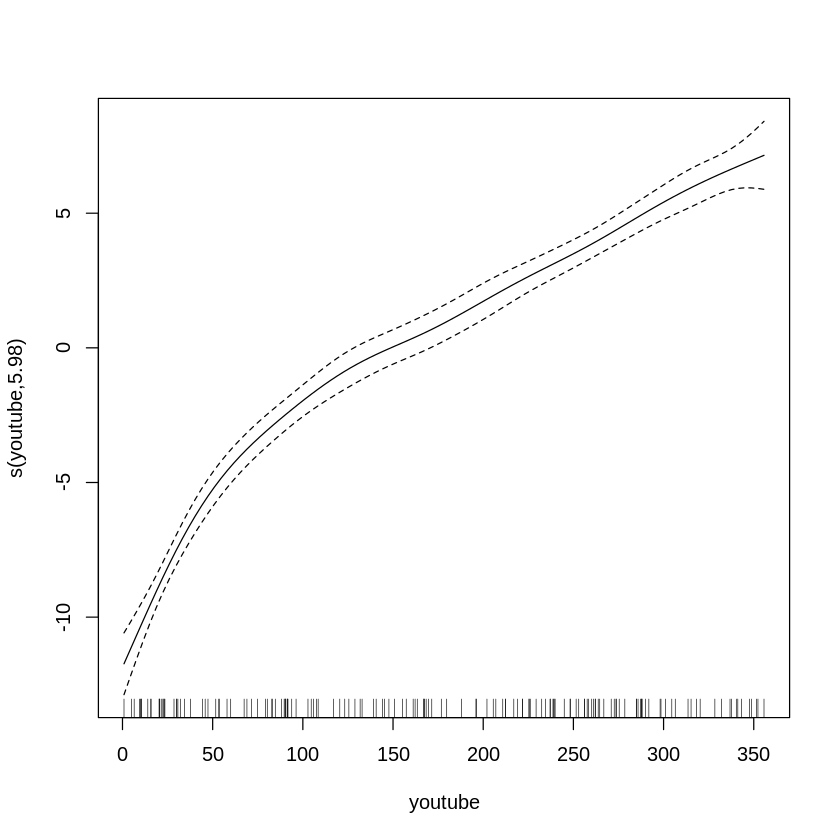

In [302]:
semiparametric_marketing = gam(sales ~ s(youtube) + facebook, data=train_marketing, family = gaussian)
summary(semiparametric_marketing)
plot.gam(semiparametric_marketing)

<span style="color:orange"> 
    In the final rendition of the model, 93% of the deviance is explained by the model still. The youtube variable is entered nonparamatrically, the facebook variable is entered linearly, and the newspaper variable is excluded. The resulting model is semiparametric and seems to be a very good fit using less data and getting the same adequacy.

**2.(c) Model comparisons**

Now, let's do some model comparisons on the test data. Compute the mean squared prediction error (MSPE) on the `test_marketing` data for the following three models:

- `gam_marketing` from 2.(a)


- `semiparametric_marketing`from 2.(b)


- `lm_marketing`, a linear regression model with `sales` is the response and `youtube` and `facebook` are predictors (fit on the `train_marketing` data).

State which model performs based according to this metric.

In [303]:
# mspe for gam
MPSEgam_marketing = mean((test_marketing$y - predict.gam(gam_marketing,test_marketing))^2)
cat(" The MSPE for the full additive model is ", MPSEgam_marketing, ".")


#mspe for semiparametric
MSPEsemiparametric_marketing = mean((test_marketing$y - predict.gam(semiparametric_marketing,test_marketing))^2)
cat(" The MSPE for the semiparametric additive model is ", MSPEsemiparametric_marketing, ".")


#mspe for lm
lmod_marketing = lm(sales ~ youtube + facebook, train_marketing)
MSPElmod_marketing = mean((test_marketing$y - predict(lmod_marketing,test_marketing))^2)
cat(" The MSPE for the standard linear model is ", MSPElmod_marketing, ".")

 The MSPE for the full additive model is  37048.7 . The MSPE for the semiparametric additive model is  37054.38 . The MSPE for the standard linear model is  37086.42 .

<span style="color:orange"> 
    From the calculations above, we can see that the full additive model performs the best, which is not in line with my analysis of the models, but it is so close in performance to the semiparametric model that any difference is negligible and can most likely be accounted after further revision. The order of performance from best to worst is as follows: the full GLM, the semiparametric GAM, the LM. If nothing else was learned, it was that GAMs can be useful, but may not always be necessary.